In [2]:
!pip install -q kaggle

In [3]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle (1).json


{'kaggle.json': b'{"username":"mehranehmgh","key":"c2c1365e6432393d8c5dfbe309c0236c"}'}

In [4]:
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [5]:
!kaggle datasets download -d corrieaar/apartment-rental-offers-in-germany

apartment-rental-offers-in-germany.zip: Skipping, found more recently modified local copy (use --force to force download)


In [5]:
!unzip '/content/apartment-rental-offers-in-germany.zip' -d '/content/'

Archive:  /content/apartment-rental-offers-in-germany.zip
  inflating: /content/immo_data.csv  


In [7]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from matplotlib import pyplot

In [8]:
df = pd.read_csv('/content/immo_data.csv')
df

,regio1,serviceCharge,heatingType,telekomTvOffer,telekomHybridUploadSpeed,newlyConst,balcony,picturecount,pricetrend,telekomUploadSpeed,...,regio2,regio3,description,facilities,heatingCosts,energyEfficiencyClass,lastRefurbish,electricityBasePrice,electricityKwhPrice,date
0,Nordrhein_Westfalen,245.00,central_heating,ONE_YEAR_FREE,NaN,False,False,6,4.62,10.0,...,Dortmund,Schüren,Die ebenerdig zu erreichende Erdgeschosswohnun...,Die Wohnung ist mit Laminat ausgelegt. Das Bad...,NaN,NaN,NaN,NaN,NaN,May19
1,Rheinland_Pfalz,134.00,self_contained_central_heating,ONE_YEAR_FREE,NaN,False,True,8,3.47,10.0,...,Rhein_Pfalz_Kreis,Böhl_Iggelheim,Alles neu macht der Mai – so kann es auch für ...,NaN,NaN,NaN,2019.0,NaN,NaN,May19
2,Sachsen,255.00,floor_heating,ONE_YEAR_FREE,10.0,True,True,8,2.72,2.4,...,Dresden,Äußere_Neustadt_Antonstadt,Der Neubau entsteht im Herzen der Dresdner Neu...,"* 9 m² Balkon\n* Bad mit bodengleicher Dusche,...",NaN,NaN,NaN,NaN,NaN,Oct19
3,Sachsen,58.15,district_heating,ONE_YEAR_FREE,NaN,False,True,9,1.53,40.0,...,Mittelsachsen_Kreis,Freiberg,Abseits von Lärm und Abgasen in Ihre neue Wohn...,NaN,87.23,NaN,NaN,NaN,NaN,May19
4,Bremen,138.00,self_contained_central_heating,NaN,NaN,False,True,19,2.46,NaN,...,Bremen,Neu_Schwachhausen,Es handelt sich hier um ein saniertes Mehrfami...,Diese Wohnung wurde neu saniert und ist wie fo...,NaN,NaN,NaN,NaN,NaN,Feb20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
268845,Bayern,90.00,heat_pump,ONE_YEAR_FREE,NaN,False,True,0,2.74,10.0,...,Weilheim_Schongau_Kreis,Eberfing,"Diese schöne, neuwertige Wohnung im Dachgescho...",Fliesen und Parkett. Sichtbarer Dachstuhl.,NaN,NaN,NaN,NaN,NaN,Feb20
268846,Hessen,220.00,gas_heating,NaN,NaN,False,True,12,6.49,NaN,...,Bergstraße_Kreis,Viernheim,Hier wird eine Wohnung im 2 Familienhaus angeb...,"Parkett, Kamin, Badewanne&Dusche\nGroßer Balko...",NaN,NaN,2015.0,NaN,NaN,May19
268847,Hessen,220.00,central_heating,ONE_YEAR_FREE,NaN,False,True,21,2.90,40.0,...,Limburg_Weilburg_Kreis,Limburg_an_der_Lahn,gemütliche 4-Zimmer-Wohnung im Obergeschoss ei...,"Böden: Wohn-/Schlafbereich = Laminat, Küche + ...",NaN,NaN,2019.0,NaN,NaN,Feb20
268848,Nordrhein_Westfalen,175.00,heat_pump,NaN,NaN,True,True,16,4.39,NaN,...,Köln,Dellbrück,"Neubau Erstbezug, gehobener Standard, alle Ein...","Wände:\nMaler­vlies, weiß gestrichen alter­nat...",40.00,NO_INFORMATION,2019.0,NaN,NaN,May19


# Data Cleaning

In [9]:
df.head()

,regio1,serviceCharge,heatingType,telekomTvOffer,telekomHybridUploadSpeed,newlyConst,balcony,picturecount,pricetrend,telekomUploadSpeed,...,regio2,regio3,description,facilities,heatingCosts,energyEfficiencyClass,lastRefurbish,electricityBasePrice,electricityKwhPrice,date
0,Nordrhein_Westfalen,245.00,central_heating,ONE_YEAR_FREE,NaN,False,False,6,4.62,10.0,...,Dortmund,Schüren,Die ebenerdig zu erreichende Erdgeschosswohnun...,Die Wohnung ist mit Laminat ausgelegt. Das Bad...,NaN,NaN,NaN,NaN,NaN,May19
1,Rheinland_Pfalz,134.00,self_contained_central_heating,ONE_YEAR_FREE,NaN,False,True,8,3.47,10.0,...,Rhein_Pfalz_Kreis,Böhl_Iggelheim,Alles neu macht der Mai – so kann es auch für ...,NaN,NaN,NaN,2019.0,NaN,NaN,May19
2,Sachsen,255.00,floor_heating,ONE_YEAR_FREE,10.0,True,True,8,2.72,2.4,...,Dresden,Äußere_Neustadt_Antonstadt,Der Neubau entsteht im Herzen der Dresdner Neu...,"* 9 m² Balkon\n* Bad mit bodengleicher Dusche,...",NaN,NaN,NaN,NaN,NaN,Oct19
3,Sachsen,58.15,district_heating,ONE_YEAR_FREE,NaN,False,True,9,1.53,40.0,...,Mittelsachsen_Kreis,Freiberg,Abseits von Lärm und Abgasen in Ihre neue Wohn...,NaN,87.23,NaN,NaN,NaN,NaN,May19
4,Bremen,138.00,self_contained_central_heating,NaN,NaN,False,True,19,2.46,NaN,...,Bremen,Neu_Schwachhausen,Es handelt sich hier um ein saniertes Mehrfami...,Diese Wohnung wurde neu saniert und ist wie fo...,NaN,NaN,NaN,NaN,NaN,Feb20


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 268850 entries, 0 to 268849
Data columns (total 49 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   regio1                    268850 non-null  object 
 1   serviceCharge             261941 non-null  float64
 2   heatingType               223994 non-null  object 
 3   telekomTvOffer            236231 non-null  object 
 4   telekomHybridUploadSpeed  45020 non-null   float64
 5   newlyConst                268850 non-null  bool   
 6   balcony                   268850 non-null  bool   
 7   picturecount              268850 non-null  int64  
 8   pricetrend                267018 non-null  float64
 9   telekomUploadSpeed        235492 non-null  float64
 10  totalRent                 228333 non-null  float64
 11  yearConstructed           211805 non-null  float64
 12  scoutId                   268850 non-null  int64  
 13  noParkSpaces              93052 non-null   f

In [11]:
df.isna().sum()

regio1                           0
serviceCharge                 6909
heatingType                  44856
telekomTvOffer               32619
telekomHybridUploadSpeed    223830
newlyConst                       0
balcony                          0
picturecount                     0
pricetrend                    1832
telekomUploadSpeed           33358
totalRent                    40517
yearConstructed              57045
scoutId                          0
noParkSpaces                175798
firingTypes                  56964
hasKitchen                       0
geo_bln                          0
cellar                           0
yearConstructedRange         57045
baseRent                         0
houseNumber                  71018
livingSpace                      0
geo_krs                          0
condition                    68489
interiorQual                112665
petsAllowed                 114573
street                           0
streetPlain                  71013
lift                

In [12]:
df.describe()

,serviceCharge,telekomHybridUploadSpeed,picturecount,pricetrend,telekomUploadSpeed,totalRent,yearConstructed,scoutId,noParkSpaces,yearConstructedRange,...,noRooms,thermalChar,floor,numberOfFloors,noRoomsRange,livingSpaceRange,heatingCosts,lastRefurbish,electricityBasePrice,electricityKwhPrice
count,261941.000000,45020.0,268850.000000,267018.000000,235492.000000,2.283330e+05,211805.000000,2.688500e+05,93052.000000,211805.000000,...,268850.000000,162344.000000,217541.000000,171118.000000,268850.000000,268850.000000,85518.000000,80711.000000,46846.000000,46846.000000
mean,151.206113,10.0,9.791958,3.389001,28.804928,9.013315e+02,1966.400590,1.069697e+08,1.327634,3.714544,...,2.641261,114.749533,2.122405,3.572319,2.571542,3.070790,76.990866,2013.904536,89.113612,0.199769
std,308.295790,0.0,6.408399,1.964874,16.337151,3.323833e+04,46.992207,1.250093e+07,8.361403,2.738134,...,2.633440,61.653663,3.634934,6.375496,0.937594,1.407127,147.716278,10.963125,5.395805,0.009667
min,0.000000,10.0,0.000000,-12.330000,1.000000,0.000000e+00,1000.000000,2.887174e+07,0.000000,1.000000,...,1.000000,0.100000,-1.000000,0.000000,1.000000,1.000000,0.000000,1015.000000,71.430000,0.170500
25%,95.000000,10.0,6.000000,2.000000,10.000000,4.698000e+02,1950.000000,1.066910e+08,1.000000,1.000000,...,2.000000,79.000000,1.000000,2.000000,2.000000,2.000000,54.000000,2012.000000,90.760000,0.191500
50%,135.000000,10.0,9.000000,3.390000,40.000000,6.500000e+02,1973.000000,1.111584e+08,1.000000,3.000000,...,3.000000,107.000000,2.000000,3.000000,3.000000,3.000000,70.000000,2017.000000,90.760000,0.198500
75%,190.000000,10.0,13.000000,4.570000,40.000000,9.850000e+02,1996.000000,1.137688e+08,1.000000,5.000000,...,3.000000,140.300000,3.000000,4.000000,3.000000,4.000000,90.000000,2019.000000,90.760000,0.205500
max,146118.000000,10.0,121.000000,14.920000,100.000000,1.575154e+07,2090.000000,1.157117e+08,2241.000000,9.000000,...,999.990000,1996.000000,999.000000,999.000000,5.000000,7.000000,12613.000000,2919.000000,90.760000,0.227600


In [13]:
null_percent = ((df.isnull().sum().sort_values(ascending=False)/df.shape[0])*100).sort_values(ascending=False)
null_percent

telekomHybridUploadSpeed    83.254603
electricityKwhPrice         82.575414
electricityBasePrice        82.575414
energyEfficiencyClass       71.066766
lastRefurbish               69.979171
heatingCosts                68.191185
noParkSpaces                65.388879
petsAllowed                 42.615957
interiorQual                41.906267
thermalChar                 39.615399
numberOfFloors              36.351869
houseNumber                 26.415473
streetPlain                 26.413614
condition                   25.474800
yearConstructed             21.218151
yearConstructedRange        21.218151
firingTypes                 21.188023
facilities                  19.685326
floor                       19.084620
heatingType                 16.684397
totalRent                   15.070485
typeOfFlat                  13.618747
telekomUploadSpeed          12.407662
telekomTvOffer              12.132788
description                  7.344988
serviceCharge                2.569834
pricetrend  

In [14]:
null_percent[0]

83.25460293844151

In [15]:
missing_data = pd.DataFrame(null_percent, columns=['percent'])

In [16]:
missing_data

,percent
telekomHybridUploadSpeed,83.254603
electricityKwhPrice,82.575414
electricityBasePrice,82.575414
energyEfficiencyClass,71.066766
lastRefurbish,69.979171
heatingCosts,68.191185
noParkSpaces,65.388879
petsAllowed,42.615957
interiorQual,41.906267
thermalChar,39.615399


In [17]:
df[(missing_data[missing_data['percent'] > 50]).index]

,telekomHybridUploadSpeed,electricityKwhPrice,electricityBasePrice,energyEfficiencyClass,lastRefurbish,heatingCosts,noParkSpaces
0,NaN,NaN,NaN,NaN,NaN,NaN,1.0
1,NaN,NaN,NaN,NaN,2019.0,NaN,2.0
2,10.0,NaN,NaN,NaN,NaN,NaN,1.0
3,NaN,NaN,NaN,NaN,NaN,87.23,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...
268845,NaN,NaN,NaN,NaN,NaN,NaN,1.0
268846,NaN,NaN,NaN,NaN,2015.0,NaN,1.0
268847,NaN,NaN,NaN,NaN,2019.0,NaN,1.0
268848,NaN,NaN,NaN,NO_INFORMATION,2019.0,40.00,1.0


In [18]:
df = df.drop((missing_data[missing_data['percent'] > 50]).index,1)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  """Entry point for launching an IPython kernel.


In [19]:
df.columns

Index(['regio1', 'serviceCharge', 'heatingType', 'telekomTvOffer',
       'newlyConst', 'balcony', 'picturecount', 'pricetrend',
       'telekomUploadSpeed', 'totalRent', 'yearConstructed', 'scoutId',
       'firingTypes', 'hasKitchen', 'geo_bln', 'cellar',
       'yearConstructedRange', 'baseRent', 'houseNumber', 'livingSpace',
       'geo_krs', 'condition', 'interiorQual', 'petsAllowed', 'street',
       'streetPlain', 'lift', 'baseRentRange', 'typeOfFlat', 'geo_plz',
       'noRooms', 'thermalChar', 'floor', 'numberOfFloors', 'noRoomsRange',
       'garden', 'livingSpaceRange', 'regio2', 'regio3', 'description',
       'facilities', 'date'],
      dtype='object')

In [20]:
df.shape

(268850, 42)

In [21]:
df.drop(df[df['livingSpace'] == 0.0].index, inplace = True)
df.shape

(268775, 42)

In [22]:
df.drop(df[df['totalRent'] == 0.0].index, inplace = True)
df.shape

(268544, 42)

In [23]:
df

,regio1,serviceCharge,heatingType,telekomTvOffer,newlyConst,balcony,picturecount,pricetrend,telekomUploadSpeed,totalRent,...,floor,numberOfFloors,noRoomsRange,garden,livingSpaceRange,regio2,regio3,description,facilities,date
0,Nordrhein_Westfalen,245.00,central_heating,ONE_YEAR_FREE,False,False,6,4.62,10.0,840.0,...,1.0,3.0,4,True,4,Dortmund,Schüren,Die ebenerdig zu erreichende Erdgeschosswohnun...,Die Wohnung ist mit Laminat ausgelegt. Das Bad...,May19
1,Rheinland_Pfalz,134.00,self_contained_central_heating,ONE_YEAR_FREE,False,True,8,3.47,10.0,NaN,...,NaN,NaN,3,False,4,Rhein_Pfalz_Kreis,Böhl_Iggelheim,Alles neu macht der Mai – so kann es auch für ...,NaN,May19
2,Sachsen,255.00,floor_heating,ONE_YEAR_FREE,True,True,8,2.72,2.4,1300.0,...,3.0,4.0,3,False,4,Dresden,Äußere_Neustadt_Antonstadt,Der Neubau entsteht im Herzen der Dresdner Neu...,"* 9 m² Balkon\n* Bad mit bodengleicher Dusche,...",Oct19
3,Sachsen,58.15,district_heating,ONE_YEAR_FREE,False,True,9,1.53,40.0,NaN,...,3.0,NaN,3,False,2,Mittelsachsen_Kreis,Freiberg,Abseits von Lärm und Abgasen in Ihre neue Wohn...,NaN,May19
4,Bremen,138.00,self_contained_central_heating,NaN,False,True,19,2.46,NaN,903.0,...,1.0,NaN,3,False,4,Bremen,Neu_Schwachhausen,Es handelt sich hier um ein saniertes Mehrfami...,Diese Wohnung wurde neu saniert und ist wie fo...,Feb20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
268845,Bayern,90.00,heat_pump,ONE_YEAR_FREE,False,True,0,2.74,10.0,910.0,...,NaN,NaN,3,False,4,Weilheim_Schongau_Kreis,Eberfing,"Diese schöne, neuwertige Wohnung im Dachgescho...",Fliesen und Parkett. Sichtbarer Dachstuhl.,Feb20
268846,Hessen,220.00,gas_heating,NaN,False,True,12,6.49,NaN,1150.0,...,1.0,1.0,3,False,5,Bergstraße_Kreis,Viernheim,Hier wird eine Wohnung im 2 Familienhaus angeb...,"Parkett, Kamin, Badewanne&Dusche\nGroßer Balko...",May19
268847,Hessen,220.00,central_heating,ONE_YEAR_FREE,False,True,21,2.90,40.0,930.0,...,1.0,2.0,4,True,4,Limburg_Weilburg_Kreis,Limburg_an_der_Lahn,gemütliche 4-Zimmer-Wohnung im Obergeschoss ei...,"Böden: Wohn-/Schlafbereich = Laminat, Küche + ...",Feb20
268848,Nordrhein_Westfalen,175.00,heat_pump,NaN,True,True,16,4.39,NaN,1015.0,...,NaN,5.0,2,False,3,Köln,Dellbrück,"Neubau Erstbezug, gehobener Standard, alle Ein...","Wände:\nMaler­vlies, weiß gestrichen alter­nat...",May19


In [ ]:
# df['index'] = list(range(len(df)))
# df.set_index(df['index'], inplace = True)

In [23]:
# df

In [24]:
df.isna().sum()

regio1                       0
serviceCharge             6885
heatingType              44828
telekomTvOffer           32580
newlyConst                   0
balcony                      0
picturecount                 0
pricetrend                1831
telekomUploadSpeed       33318
totalRent                40500
yearConstructed          56987
scoutId                      0
firingTypes              56915
hasKitchen                   0
geo_bln                      0
cellar                       0
yearConstructedRange     56987
baseRent                     0
houseNumber              70839
livingSpace                  0
geo_krs                      0
condition                68333
interiorQual            112489
petsAllowed             114400
street                       0
streetPlain              70834
lift                         0
baseRentRange                0
typeOfFlat               36594
geo_plz                      0
noRooms                      0
thermalChar             106379
floor   

In [25]:
df = df.drop(columns = ['facilities','description','scoutId','street','streetPlain','houseNumber','date'])

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 268544 entries, 0 to 268849
Data columns (total 35 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   regio1                268544 non-null  object 
 1   serviceCharge         261659 non-null  float64
 2   heatingType           223716 non-null  object 
 3   telekomTvOffer        235964 non-null  object 
 4   newlyConst            268544 non-null  bool   
 5   balcony               268544 non-null  bool   
 6   picturecount          268544 non-null  int64  
 7   pricetrend            266713 non-null  float64
 8   telekomUploadSpeed    235226 non-null  float64
 9   totalRent             228044 non-null  float64
 10  yearConstructed       211557 non-null  float64
 11  firingTypes           211629 non-null  object 
 12  hasKitchen            268544 non-null  bool   
 13  geo_bln               268544 non-null  object 
 14  cellar                268544 non-null  bool   
 15  

In [27]:
df._get_numeric_data().mean()

serviceCharge             151.227420
newlyConst                  0.078795
balcony                     0.616748
picturecount                9.791271
pricetrend                  3.390026
telekomUploadSpeed         28.808085
totalRent                 902.268665
yearConstructed          1966.411388
hasKitchen                  0.342603
cellar                      0.640588
yearConstructedRange        3.715457
baseRent                  694.394653
livingSpace                74.378458
lift                        0.235697
baseRentRange               3.766437
geo_plz                 37287.142074
noRooms                     2.641139
thermalChar               114.725740
floor                       2.122786
numberOfFloors              3.574554
noRoomsRange                2.571493
garden                      0.196191
livingSpaceRange            3.071500
dtype: float64

In [28]:
df.fillna(df._get_numeric_data().mean(),inplace = True)

In [29]:
df

,regio1,serviceCharge,heatingType,telekomTvOffer,newlyConst,balcony,picturecount,pricetrend,telekomUploadSpeed,totalRent,...,geo_plz,noRooms,thermalChar,floor,numberOfFloors,noRoomsRange,garden,livingSpaceRange,regio2,regio3
0,Nordrhein_Westfalen,245.00,central_heating,ONE_YEAR_FREE,False,False,6,4.62,10.000000,840.000000,...,44269,4.0,181.40000,1.000000,3.000000,4,True,4,Dortmund,Schüren
1,Rheinland_Pfalz,134.00,self_contained_central_heating,ONE_YEAR_FREE,False,True,8,3.47,10.000000,902.268665,...,67459,3.0,114.72574,2.122786,3.574554,3,False,4,Rhein_Pfalz_Kreis,Böhl_Iggelheim
2,Sachsen,255.00,floor_heating,ONE_YEAR_FREE,True,True,8,2.72,2.400000,1300.000000,...,1097,3.0,114.72574,3.000000,4.000000,3,False,4,Dresden,Äußere_Neustadt_Antonstadt
3,Sachsen,58.15,district_heating,ONE_YEAR_FREE,False,True,9,1.53,40.000000,902.268665,...,9599,3.0,86.00000,3.000000,3.574554,3,False,2,Mittelsachsen_Kreis,Freiberg
4,Bremen,138.00,self_contained_central_heating,NaN,False,True,19,2.46,28.808085,903.000000,...,28213,3.0,188.90000,1.000000,3.574554,3,False,4,Bremen,Neu_Schwachhausen
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
268845,Bayern,90.00,heat_pump,ONE_YEAR_FREE,False,True,0,2.74,10.000000,910.000000,...,82390,3.0,114.72574,2.122786,3.574554,3,False,4,Weilheim_Schongau_Kreis,Eberfing
268846,Hessen,220.00,gas_heating,NaN,False,True,12,6.49,28.808085,1150.000000,...,68519,3.5,114.72574,1.000000,1.000000,3,False,5,Bergstraße_Kreis,Viernheim
268847,Hessen,220.00,central_heating,ONE_YEAR_FREE,False,True,21,2.90,40.000000,930.000000,...,65552,4.0,160.77000,1.000000,2.000000,4,True,4,Limburg_Weilburg_Kreis,Limburg_an_der_Lahn
268848,Nordrhein_Westfalen,175.00,heat_pump,NaN,True,True,16,4.39,28.808085,1015.000000,...,51069,2.0,24.70000,2.122786,5.000000,2,False,3,Köln,Dellbrück


In [30]:
df.isnull().sum()[df.isnull().sum() > 0]

heatingType        44828
telekomTvOffer     32580
firingTypes        56915
condition          68333
interiorQual      112489
petsAllowed       114400
typeOfFlat         36594
dtype: int64

In [31]:
for cols in df.columns:
    print(df[cols].dtype)

object
float64
object
object
bool
bool
int64
float64
float64
float64
float64
object
bool
object
bool
float64
float64
float64
object
object
object
object
bool
int64
object
int64
float64
float64
float64
float64
int64
bool
int64
object
object


In [31]:
# def my_func(group):
#     for cols in group.columns:
#       if group[cols].dtype == 'int64' or group[cols].dtype == 'float64':
#         upper_range = group[cols].mean() + 3 * group[cols].std()
#         lower_range = group[cols].mean() - 3 * group[cols].std()
        
#         indexs = group[(group[cols] > upper_range) | (group[cols] < lower_range)].index
#         group = group.drop(indexs)
#     return group

In [32]:
# import time

In [56]:
# gbos = df.groupby('regio1')

In [34]:
# s_time = time.time()
# my_func,[group for _, group in gbos]))
# print(f'run time : {time.time() - s_time}')

In [33]:
# for label , group in gbos:
#     print(f'label : {label}')
#     print(f'groupby : \n {group}')

In [32]:
for cols in df.columns:
    if df[cols].dtype == 'int64' or df[cols].dtype == 'float64':
        upper_range = df[cols].mean() + 3 * df[cols].std()
        lower_range = df[cols].mean() - 3 * df[cols].std()
        
        indexs = df[(df[cols] > upper_range) | (df[cols] < lower_range)].index
        df = df.drop(indexs)

In [33]:
df

,regio1,serviceCharge,heatingType,telekomTvOffer,newlyConst,balcony,picturecount,pricetrend,telekomUploadSpeed,totalRent,...,geo_plz,noRooms,thermalChar,floor,numberOfFloors,noRoomsRange,garden,livingSpaceRange,regio2,regio3
0,Nordrhein_Westfalen,245.00,central_heating,ONE_YEAR_FREE,False,False,6,4.62,10.000000,840.000000,...,44269,4.0,181.40000,1.000000,3.000000,4,True,4,Dortmund,Schüren
1,Rheinland_Pfalz,134.00,self_contained_central_heating,ONE_YEAR_FREE,False,True,8,3.47,10.000000,902.268665,...,67459,3.0,114.72574,2.122786,3.574554,3,False,4,Rhein_Pfalz_Kreis,Böhl_Iggelheim
2,Sachsen,255.00,floor_heating,ONE_YEAR_FREE,True,True,8,2.72,2.400000,1300.000000,...,1097,3.0,114.72574,3.000000,4.000000,3,False,4,Dresden,Äußere_Neustadt_Antonstadt
3,Sachsen,58.15,district_heating,ONE_YEAR_FREE,False,True,9,1.53,40.000000,902.268665,...,9599,3.0,86.00000,3.000000,3.574554,3,False,2,Mittelsachsen_Kreis,Freiberg
4,Bremen,138.00,self_contained_central_heating,NaN,False,True,19,2.46,28.808085,903.000000,...,28213,3.0,188.90000,1.000000,3.574554,3,False,4,Bremen,Neu_Schwachhausen
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
268845,Bayern,90.00,heat_pump,ONE_YEAR_FREE,False,True,0,2.74,10.000000,910.000000,...,82390,3.0,114.72574,2.122786,3.574554,3,False,4,Weilheim_Schongau_Kreis,Eberfing
268846,Hessen,220.00,gas_heating,NaN,False,True,12,6.49,28.808085,1150.000000,...,68519,3.5,114.72574,1.000000,1.000000,3,False,5,Bergstraße_Kreis,Viernheim
268847,Hessen,220.00,central_heating,ONE_YEAR_FREE,False,True,21,2.90,40.000000,930.000000,...,65552,4.0,160.77000,1.000000,2.000000,4,True,4,Limburg_Weilburg_Kreis,Limburg_an_der_Lahn
268848,Nordrhein_Westfalen,175.00,heat_pump,NaN,True,True,16,4.39,28.808085,1015.000000,...,51069,2.0,24.70000,2.122786,5.000000,2,False,3,Köln,Dellbrück


In [34]:
df.shape

(258253, 35)

In [35]:
df['geo_bln'].value_counts()

Nordrhein_Westfalen       60590
Sachsen                   56798
Bayern                    20728
Sachsen_Anhalt            19744
Hessen                    17097
Niedersachsen             16007
Baden_Württemberg         15477
Thüringen                  8229
Rheinland_Pfalz            8109
Berlin                     7942
Brandenburg                6747
Mecklenburg_Vorpommern     6482
Schleswig_Holstein         6426
Hamburg                    3609
Bremen                     2897
Saarland                   1371
Name: geo_bln, dtype: int64

In [36]:
for cols in df.columns:
    if df[cols].dtype == 'object' or df[cols].dtype == 'bool':
        print('column : ',cols)
        print(df[cols].value_counts().head(1))

column :  regio1
Nordrhein_Westfalen    60590
Name: regio1, dtype: int64
column :  heatingType
central_heating    123962
Name: heatingType, dtype: int64
column :  telekomTvOffer
ONE_YEAR_FREE    218571
Name: telekomTvOffer, dtype: int64
column :  newlyConst
False    237876
Name: newlyConst, dtype: int64
column :  balcony
True    159377
Name: balcony, dtype: int64
column :  firingTypes
gas    106460
Name: firingTypes, dtype: int64
column :  hasKitchen
False    170970
Name: hasKitchen, dtype: int64
column :  geo_bln
Nordrhein_Westfalen    60590
Name: geo_bln, dtype: int64
column :  cellar
True    166012
Name: cellar, dtype: int64
column :  geo_krs
Leipzig    13411
Name: geo_krs, dtype: int64
column :  condition
well_kept    64421
Name: condition, dtype: int64
column :  interiorQual
normal    79371
Name: interiorQual, dtype: int64
column :  petsAllowed
negotiable    88192
Name: petsAllowed, dtype: int64
column :  lift
False    198064
Name: lift, dtype: int64
column :  typeOfFlat
apartment

In [37]:
for cols in df.columns:
  if df[cols].dtype == 'object' or df[cols].dtype == 'bool':
    print('cols : {} , value : {}'.format(cols , df[cols].value_counts().head(1).index[0]))
    df[cols].fillna(df[cols].value_counts().head(1).index[0],inplace = True)

cols : regio1 , value : Nordrhein_Westfalen
cols : heatingType , value : central_heating
cols : telekomTvOffer , value : ONE_YEAR_FREE
cols : newlyConst , value : False
cols : balcony , value : True
cols : firingTypes , value : gas
cols : hasKitchen , value : False
cols : geo_bln , value : Nordrhein_Westfalen
cols : cellar , value : True
cols : geo_krs , value : Leipzig
cols : condition , value : well_kept
cols : interiorQual , value : normal
cols : petsAllowed , value : negotiable
cols : lift , value : False
cols : typeOfFlat , value : apartment
cols : garden , value : False
cols : regio2 , value : Leipzig
cols : regio3 , value : Innenstadt


In [38]:
df

,regio1,serviceCharge,heatingType,telekomTvOffer,newlyConst,balcony,picturecount,pricetrend,telekomUploadSpeed,totalRent,...,geo_plz,noRooms,thermalChar,floor,numberOfFloors,noRoomsRange,garden,livingSpaceRange,regio2,regio3
0,Nordrhein_Westfalen,245.00,central_heating,ONE_YEAR_FREE,False,False,6,4.62,10.000000,840.000000,...,44269,4.0,181.40000,1.000000,3.000000,4,True,4,Dortmund,Schüren
1,Rheinland_Pfalz,134.00,self_contained_central_heating,ONE_YEAR_FREE,False,True,8,3.47,10.000000,902.268665,...,67459,3.0,114.72574,2.122786,3.574554,3,False,4,Rhein_Pfalz_Kreis,Böhl_Iggelheim
2,Sachsen,255.00,floor_heating,ONE_YEAR_FREE,True,True,8,2.72,2.400000,1300.000000,...,1097,3.0,114.72574,3.000000,4.000000,3,False,4,Dresden,Äußere_Neustadt_Antonstadt
3,Sachsen,58.15,district_heating,ONE_YEAR_FREE,False,True,9,1.53,40.000000,902.268665,...,9599,3.0,86.00000,3.000000,3.574554,3,False,2,Mittelsachsen_Kreis,Freiberg
4,Bremen,138.00,self_contained_central_heating,ONE_YEAR_FREE,False,True,19,2.46,28.808085,903.000000,...,28213,3.0,188.90000,1.000000,3.574554,3,False,4,Bremen,Neu_Schwachhausen
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
268845,Bayern,90.00,heat_pump,ONE_YEAR_FREE,False,True,0,2.74,10.000000,910.000000,...,82390,3.0,114.72574,2.122786,3.574554,3,False,4,Weilheim_Schongau_Kreis,Eberfing
268846,Hessen,220.00,gas_heating,ONE_YEAR_FREE,False,True,12,6.49,28.808085,1150.000000,...,68519,3.5,114.72574,1.000000,1.000000,3,False,5,Bergstraße_Kreis,Viernheim
268847,Hessen,220.00,central_heating,ONE_YEAR_FREE,False,True,21,2.90,40.000000,930.000000,...,65552,4.0,160.77000,1.000000,2.000000,4,True,4,Limburg_Weilburg_Kreis,Limburg_an_der_Lahn
268848,Nordrhein_Westfalen,175.00,heat_pump,ONE_YEAR_FREE,True,True,16,4.39,28.808085,1015.000000,...,51069,2.0,24.70000,2.122786,5.000000,2,False,3,Köln,Dellbrück


In [39]:
df.isna().sum()

regio1                  0
serviceCharge           0
heatingType             0
telekomTvOffer          0
newlyConst              0
balcony                 0
picturecount            0
pricetrend              0
telekomUploadSpeed      0
totalRent               0
yearConstructed         0
firingTypes             0
hasKitchen              0
geo_bln                 0
cellar                  0
yearConstructedRange    0
baseRent                0
livingSpace             0
geo_krs                 0
condition               0
interiorQual            0
petsAllowed             0
lift                    0
baseRentRange           0
typeOfFlat              0
geo_plz                 0
noRooms                 0
thermalChar             0
floor                   0
numberOfFloors          0
noRoomsRange            0
garden                  0
livingSpaceRange        0
regio2                  0
regio3                  0
dtype: int64

In [40]:
for cols in df.columns:
    if df[cols].dtype == 'object' or df[cols].dtype == 'bool':
        print('cols : {} , unique values : {}'.format(cols,df[cols].nunique()))

cols : regio1 , unique values : 16
cols : heatingType , unique values : 13
cols : telekomTvOffer , unique values : 3
cols : newlyConst , unique values : 2
cols : balcony , unique values : 2
cols : firingTypes , unique values : 130
cols : hasKitchen , unique values : 2
cols : geo_bln , unique values : 16
cols : cellar , unique values : 2
cols : geo_krs , unique values : 419
cols : condition , unique values : 10
cols : interiorQual , unique values : 4
cols : petsAllowed , unique values : 3
cols : lift , unique values : 2
cols : typeOfFlat , unique values : 10
cols : garden , unique values : 2
cols : regio2 , unique values : 419
cols : regio3 , unique values : 8593


In [41]:
df.columns

Index(['regio1', 'serviceCharge', 'heatingType', 'telekomTvOffer',
       'newlyConst', 'balcony', 'picturecount', 'pricetrend',
       'telekomUploadSpeed', 'totalRent', 'yearConstructed', 'firingTypes',
       'hasKitchen', 'geo_bln', 'cellar', 'yearConstructedRange', 'baseRent',
       'livingSpace', 'geo_krs', 'condition', 'interiorQual', 'petsAllowed',
       'lift', 'baseRentRange', 'typeOfFlat', 'geo_plz', 'noRooms',
       'thermalChar', 'floor', 'numberOfFloors', 'noRoomsRange', 'garden',
       'livingSpaceRange', 'regio2', 'regio3'],
      dtype='object')

In [42]:
df.duplicated().sum()

1597

In [43]:
df.loc[df.duplicated(), :]

,regio1,serviceCharge,heatingType,telekomTvOffer,newlyConst,balcony,picturecount,pricetrend,telekomUploadSpeed,totalRent,...,geo_plz,noRooms,thermalChar,floor,numberOfFloors,noRoomsRange,garden,livingSpaceRange,regio2,regio3
2811,Sachsen,220.00,central_heating,ONE_YEAR_FREE,False,False,14,3.28,10.0,678.000000,...,4357,2.0,189.80000,2.122786,3.574554,2,False,3,Leipzig,Mockau_Süd
9410,Sachsen,260.00,district_heating,ONE_YEAR_FREE,True,True,4,2.78,40.0,1295.000000,...,4178,4.0,62.00000,1.000000,3.574554,4,True,6,Leipzig,Böhlitz_Ehrenberg
11601,Nordrhein_Westfalen,35.00,central_heating,ONE_YEAR_FREE,False,False,5,2.91,40.0,902.268665,...,47533,2.5,114.72574,1.000000,3.574554,2,False,2,Kleve_Kreis,Kleve
14109,Sachsen,150.00,district_heating,ONE_YEAR_FREE,False,True,4,2.19,2.4,290.100000,...,2828,3.0,125.00000,5.000000,3.574554,3,False,3,Görlitz,Königshufen
15066,Sachsen,105.00,gas_heating,ONE_YEAR_FREE,False,True,5,-0.20,40.0,345.000000,...,9131,2.0,114.72574,4.000000,3.574554,2,True,2,Chemnitz,Hilbersdorf
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
268213,Nordrhein_Westfalen,120.00,night_storage_heater,ONE_YEAR_FREE,False,False,9,3.34,40.0,520.700000,...,42477,3.0,103.40000,0.000000,3.000000,3,False,3,Oberbergischer_Kreis,Radevormwald
268259,Sachsen_Anhalt,142.75,district_heating,ONE_YEAR_FREE,False,True,13,1.90,40.0,599.550000,...,39122,2.0,114.72574,2.000000,3.000000,2,False,2,Magdeburg,Fermersleben
268420,Nordrhein_Westfalen,115.00,district_heating,ONE_YEAR_FREE,False,True,7,3.33,10.0,550.000000,...,47226,3.0,127.00000,2.000000,3.000000,3,False,3,Duisburg,Rheinhausen_Mitte
268560,Schleswig_Holstein,80.40,district_heating,ONE_YEAR_FREE,False,False,2,4.68,10.0,389.230000,...,24534,1.0,114.72574,0.000000,3.574554,1,False,1,Neumünster,Innenstadt


In [44]:
df.drop_duplicates(inplace=True)

In [45]:
df.duplicated().sum()

0

# **Data Visualzation**

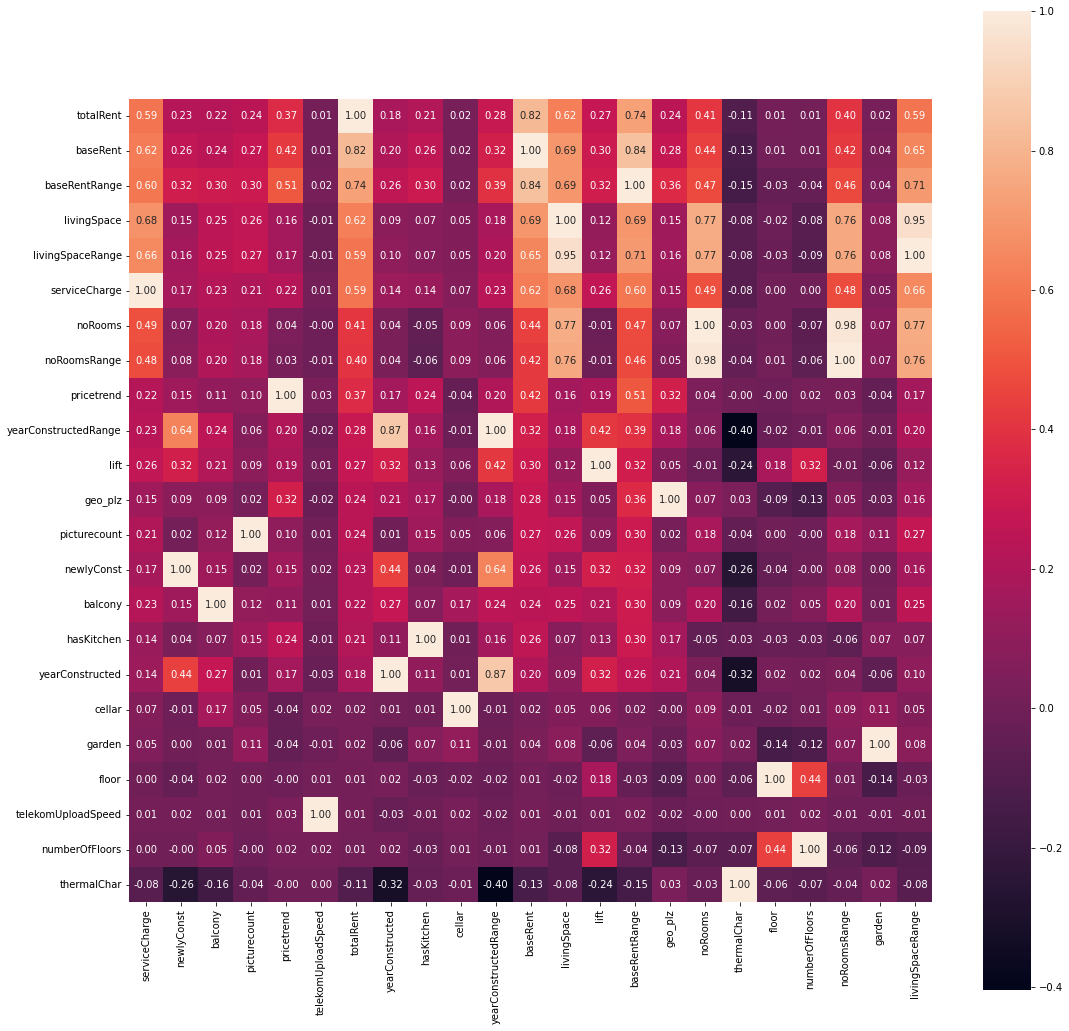

In [113]:
f, ax = plt.subplots(figsize=(18, 18))

sns.heatmap(df.corr().sort_values(by='totalRent',ascending=False), square = True,fmt='.2f' ,annot = True)

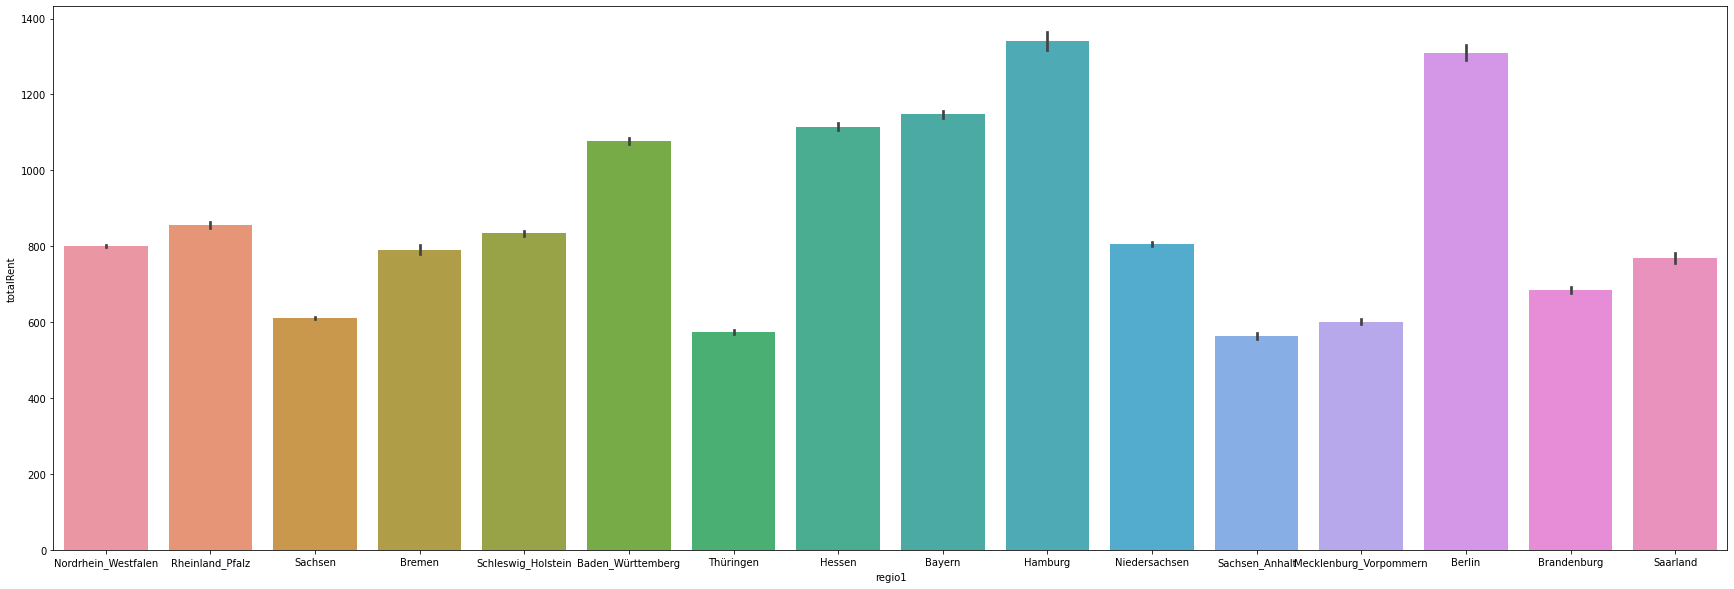

In [114]:
#plot the data against base_rent(target_variable)
plt.figure(figsize=(30,10))

sns.barplot(x=df.regio1, y=df.totalRent)
plt.show()

In [115]:
import plotly.express as px
rentmean = df.groupby(['regio1'])['totalRent'].mean().sort_index()

fig = px.histogram(x = df['regio1'].value_counts().sort_index().index,
                   y = rentmean,
                   color= df['regio1'].value_counts().sort_index().index
             )
fig.update_xaxes(title="City")
fig.update_yaxes(title = "Average rental per month")
fig.show()

In [116]:
region2 = list(df['regio2'].value_counts().head(20).index)
region2 # top 20 city that contains the most data counts

['Leipzig',
 'Chemnitz',
 'Berlin',
 'Dresden',
 'Magdeburg',
 'Halle_Saale',
 'München',
 'Essen',
 'Frankfurt_am_Main',
 'Hamburg',
 'Düsseldorf',
 'Duisburg',
 'Mittelsachsen_Kreis',
 'Dortmund',
 'Gelsenkirchen',
 'Recklinghausen_Kreis',
 'Köln',
 'Zwickau',
 'Wuppertal',
 'Zwickau_Kreis']

In [117]:
len(region2)

20

In [118]:
most = []
for i in range(len(region2)):
  temp = df['regio2'] == region2[i]
  most.append(df[temp])

In [119]:
len(most)

20

In [120]:
new_df = pd.concat(most)

In [121]:
new_df

,regio1,serviceCharge,heatingType,telekomTvOffer,newlyConst,balcony,picturecount,pricetrend,telekomUploadSpeed,totalRent,...,geo_plz,noRooms,thermalChar,floor,numberOfFloors,noRoomsRange,garden,livingSpaceRange,regio2,regio3
22,Sachsen,346.00000,central_heating,ONE_YEAR_FREE,False,True,22,5.34,40.000000,1946.000000,...,4229,4.0,114.72574,0.000000,3.574554,4,True,6,Leipzig,Lindenau
72,Sachsen,151.22742,central_heating,ONE_YEAR_FREE,True,False,3,5.46,28.808085,420.240000,...,4317,2.0,51.00000,1.000000,4.000000,2,False,2,Leipzig,Reudnitz_Thonberg
74,Sachsen,120.00000,central_heating,ONE_YEAR_FREE,False,True,13,2.74,40.000000,580.000000,...,4178,2.0,115.40000,1.000000,4.000000,2,True,2,Leipzig,Böhlitz_Ehrenberg
76,Sachsen,65.00000,central_heating,ONE_YEAR_FREE,False,False,6,3.85,40.000000,346.000000,...,4207,1.0,114.72574,5.000000,3.574554,1,False,1,Leipzig,Lausen_Grünau
93,Sachsen,50.00000,district_heating,ONE_YEAR_FREE,False,False,1,6.06,40.000000,600.000000,...,4317,2.0,114.72574,2.122786,3.574554,2,False,3,Leipzig,Reudnitz_Thonberg
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
268380,Sachsen,138.66000,central_heating,ONE_YEAR_FREE,False,True,25,1.96,2.400000,799.190000,...,9353,4.0,72.00000,6.000000,6.000000,4,False,6,Zwickau_Kreis,Oberlungwitz
268461,Sachsen,130.00000,district_heating,ONE_YEAR_FREE,False,False,13,0.95,40.000000,319.440000,...,9337,1.0,114.00000,3.000000,4.000000,1,False,1,Zwickau_Kreis,Hohenstein_Ernstthal
268593,Sachsen,150.00000,central_heating,ONE_YEAR_FREE,False,True,9,0.00,28.808085,902.268665,...,9212,2.0,152.00000,0.000000,2.000000,2,True,3,Zwickau_Kreis,Limbach_Oberfrohna
268683,Sachsen,130.00000,central_heating,ONE_YEAR_FREE,False,False,9,2.00,40.000000,430.000000,...,9350,2.0,151.52000,2.122786,3.574554,2,False,2,Zwickau_Kreis,Lichtenstein/Sachsen


In [122]:
new_df.regio2.nunique()

20

In [123]:
rentmean = new_df.groupby(['regio2'])['totalRent'].mean().sort_index()

fig = px.histogram(x = new_df['regio2'].value_counts().sort_index().index,
                   y = rentmean,
                   color= new_df['regio2'].value_counts().sort_index().index
             )
fig.update_xaxes(title="City")
fig.update_yaxes(title = "Average rental per month")
fig.show()

In [124]:
region3 = list(df['regio3'].value_counts().head(20).index)
region3 # top 20 city that contains the most data counts

['Innenstadt',
 'Stadtmitte',
 'Altstadt',
 'Sonnenberg',
 'Kaßberg',
 'Mitte',
 'Schloßchemnitz',
 'Hilbersdorf',
 'Zentrum',
 'Südstadt',
 'Merseburg',
 'Freiberg',
 'Gablenz',
 'Bernsdorf',
 'Stadtfeld_Ost',
 'Lutherviertel',
 'Mitte_Mitte',
 'Riesa',
 'Halberstadt',
 'Altendorf']

In [125]:
most = []
for i in range(len(region3)):
  temp = df['regio3'] == region3[i]
  most.append(df[temp])

In [126]:
new_df = pd.concat(most)

In [127]:
rentmean = new_df.groupby(['regio3'])['totalRent'].mean().sort_index()

fig = px.histogram(x = new_df['regio3'].value_counts().sort_index().index,
                   y = rentmean,
                   color= new_df['regio3'].value_counts().sort_index().index
             )
fig.update_xaxes(title="City")
fig.update_yaxes(title = "Average rental per month")
fig.show()

In [128]:
df.columns

Index(['regio1', 'serviceCharge', 'heatingType', 'telekomTvOffer',
       'newlyConst', 'balcony', 'picturecount', 'pricetrend',
       'telekomUploadSpeed', 'totalRent', 'yearConstructed', 'firingTypes',
       'hasKitchen', 'geo_bln', 'cellar', 'yearConstructedRange', 'baseRent',
       'livingSpace', 'geo_krs', 'condition', 'interiorQual', 'petsAllowed',
       'lift', 'baseRentRange', 'typeOfFlat', 'geo_plz', 'noRooms',
       'thermalChar', 'floor', 'numberOfFloors', 'noRoomsRange', 'garden',
       'livingSpaceRange', 'regio2', 'regio3'],
      dtype='object')

In [129]:
df.firingTypes.nunique()

130

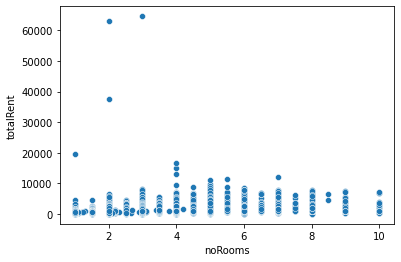

In [131]:
sns.scatterplot(data=df, x='noRooms', y='totalRent')

# Model

In [61]:
predict_df = df.copy()
predict_df.head()

,regio1,serviceCharge,heatingType,telekomTvOffer,newlyConst,balcony,picturecount,pricetrend,telekomUploadSpeed,totalRent,...,geo_plz,noRooms,thermalChar,floor,numberOfFloors,noRoomsRange,garden,livingSpaceRange,regio2,regio3
0,Nordrhein_Westfalen,245.00,central_heating,ONE_YEAR_FREE,False,False,6,4.62,10.000000,840.000000,...,44269,4.0,181.40000,1.000000,3.000000,4,True,4,Dortmund,Schüren
1,Rheinland_Pfalz,134.00,self_contained_central_heating,ONE_YEAR_FREE,False,True,8,3.47,10.000000,902.268665,...,67459,3.0,114.72574,2.122786,3.574554,3,False,4,Rhein_Pfalz_Kreis,Böhl_Iggelheim
2,Sachsen,255.00,floor_heating,ONE_YEAR_FREE,True,True,8,2.72,2.400000,1300.000000,...,1097,3.0,114.72574,3.000000,4.000000,3,False,4,Dresden,Äußere_Neustadt_Antonstadt
3,Sachsen,58.15,district_heating,ONE_YEAR_FREE,False,True,9,1.53,40.000000,902.268665,...,9599,3.0,86.00000,3.000000,3.574554,3,False,2,Mittelsachsen_Kreis,Freiberg
4,Bremen,138.00,self_contained_central_heating,ONE_YEAR_FREE,False,True,19,2.46,28.808085,903.000000,...,28213,3.0,188.90000,1.000000,3.574554,3,False,4,Bremen,Neu_Schwachhausen


In [62]:
predict_df = predict_df.drop(columns = ['regio2','regio3'])

In [63]:
categorical_columns = []
for cols in predict_df.columns:
    if predict_df[cols].dtype == 'object' or predict_df[cols].dtype == 'bool':
        categorical_columns.append(cols)

categorical_columns

['regio1',
 'heatingType',
 'telekomTvOffer',
 'newlyConst',
 'balcony',
 'firingTypes',
 'hasKitchen',
 'geo_bln',
 'cellar',
 'geo_krs',
 'condition',
 'interiorQual',
 'petsAllowed',
 'lift',
 'typeOfFlat',
 'garden']

In [64]:
categorical_columns = []
for cols in predict_df.columns:
    if predict_df[cols].dtype == 'object' or predict_df[cols].dtype == 'bool':
        categorical_columns.append(cols)
        
dummies_feature = pd.get_dummies(predict_df[categorical_columns])
dummies_feature.head()

,newlyConst,balcony,hasKitchen,cellar,lift,garden,regio1_Baden_Württemberg,regio1_Bayern,regio1_Berlin,regio1_Brandenburg,...,typeOfFlat_apartment,typeOfFlat_ground_floor,typeOfFlat_half_basement,typeOfFlat_loft,typeOfFlat_maisonette,typeOfFlat_other,typeOfFlat_penthouse,typeOfFlat_raised_ground_floor,typeOfFlat_roof_storey,typeOfFlat_terraced_flat
0,False,False,False,True,False,True,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
1,False,True,False,False,False,False,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
2,True,True,False,True,True,False,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
3,False,True,False,False,False,False,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4,False,True,False,False,False,False,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0


In [65]:
predict_df = pd.concat([predict_df, dummies_feature], axis=1)
predict_df = predict_df.drop(columns=categorical_columns)
predict_df.head()

,serviceCharge,picturecount,pricetrend,telekomUploadSpeed,totalRent,yearConstructed,yearConstructedRange,baseRent,livingSpace,baseRentRange,...,typeOfFlat_apartment,typeOfFlat_ground_floor,typeOfFlat_half_basement,typeOfFlat_loft,typeOfFlat_maisonette,typeOfFlat_other,typeOfFlat_penthouse,typeOfFlat_raised_ground_floor,typeOfFlat_roof_storey,typeOfFlat_terraced_flat
0,245.00,6,4.62,10.000000,840.000000,1965.0,2.0,595.0,86.00,4,...,0,1,0,0,0,0,0,0,0,0
1,134.00,8,3.47,10.000000,902.268665,1871.0,1.0,800.0,89.00,5,...,0,1,0,0,0,0,0,0,0,0
2,255.00,8,2.72,2.400000,1300.000000,2019.0,9.0,965.0,83.80,6,...,1,0,0,0,0,0,0,0,0,0
3,58.15,9,1.53,40.000000,902.268665,1964.0,2.0,343.0,58.15,2,...,0,0,0,0,0,1,0,0,0,0
4,138.00,19,2.46,28.808085,903.000000,1950.0,1.0,765.0,84.97,5,...,1,0,0,0,0,0,0,0,0,0


## **Split Data**

In [75]:
y = predict_df['totalRent'].values
x = predict_df.drop(columns = ['totalRent']).values

print(x.shape)
print(y.shape)

(256656, 640)
(256656,)


In [76]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)

In [77]:
print(x_train.shape)
print(y_train.shape)


print(x_test.shape)
print(y_test.shape)

(205324, 640)
(205324,)
(51332, 640)
(51332,)


In [69]:
# from sklearn.preprocessing import StandardScaler
# sc = StandardScaler()

# x_train = sc.fit_transform(x_train)
# x_test = sc.transform(x_test)

## ***Regression***

In [78]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
Linear = LinearRegression()

In [79]:
Linear.fit(x_train,y_train)

LinearRegression()

In [80]:
y_pred = Linear.predict(x_test)

In [81]:
#MSE for test

mean_squared_error(y_pred,y_test)

91296846797.69429

In [82]:
pred = pd.DataFrame({'test':y_test,'pred':y_pred})
pred.head()

,test,pred
0,340.670000,436.991654
1,902.268665,657.586598
2,435.000000,398.084871
3,625.000000,659.750151
4,435.900000,438.416746


## **Ridge Regression**

In [97]:
from sklearn.linear_model import Ridge

ridge_reg = Ridge(alpha=0.1)
ridge_reg.fit(x_train, y_train)
ridge_pred = ridge_reg.predict(x_test)

In [98]:
mean_squared_error(ridge_pred,y_test)

43064.09696104959

In [99]:
pred = pd.DataFrame({'test':y_test,'pred':ridge_pred})
pred.head()

,test,pred
0,340.670000,436.997653
1,902.268665,657.574511
2,435.000000,398.354332
3,625.000000,659.769513
4,435.900000,438.445328


## **Lasso Regression**

In [102]:
from sklearn.linear_model import Lasso

lasso_reg = Lasso(alpha=0.001)
lasso_reg.fit(x_train, y_train)
lasso_pred = lasso_reg.predict(x_test)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.840e+09, tolerance: 5.938e+06
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


In [103]:
mean_squared_error(lasso_pred,y_test)

43049.90098063713

In [104]:
pred = pd.DataFrame({'test':y_test,'pred':lasso_pred})
pred.head()

,test,pred
0,340.670000,435.453268
1,902.268665,657.845420
2,435.000000,406.256213
3,625.000000,659.730616
4,435.900000,438.260750


# **Using multiprocessing**

In [105]:
df = pd.read_csv('/content/immo_data.csv')
df

,regio1,serviceCharge,heatingType,telekomTvOffer,telekomHybridUploadSpeed,newlyConst,balcony,picturecount,pricetrend,telekomUploadSpeed,...,regio2,regio3,description,facilities,heatingCosts,energyEfficiencyClass,lastRefurbish,electricityBasePrice,electricityKwhPrice,date
0,Nordrhein_Westfalen,245.00,central_heating,ONE_YEAR_FREE,NaN,False,False,6,4.62,10.0,...,Dortmund,Schüren,Die ebenerdig zu erreichende Erdgeschosswohnun...,Die Wohnung ist mit Laminat ausgelegt. Das Bad...,NaN,NaN,NaN,NaN,NaN,May19
1,Rheinland_Pfalz,134.00,self_contained_central_heating,ONE_YEAR_FREE,NaN,False,True,8,3.47,10.0,...,Rhein_Pfalz_Kreis,Böhl_Iggelheim,Alles neu macht der Mai – so kann es auch für ...,NaN,NaN,NaN,2019.0,NaN,NaN,May19
2,Sachsen,255.00,floor_heating,ONE_YEAR_FREE,10.0,True,True,8,2.72,2.4,...,Dresden,Äußere_Neustadt_Antonstadt,Der Neubau entsteht im Herzen der Dresdner Neu...,"* 9 m² Balkon\n* Bad mit bodengleicher Dusche,...",NaN,NaN,NaN,NaN,NaN,Oct19
3,Sachsen,58.15,district_heating,ONE_YEAR_FREE,NaN,False,True,9,1.53,40.0,...,Mittelsachsen_Kreis,Freiberg,Abseits von Lärm und Abgasen in Ihre neue Wohn...,NaN,87.23,NaN,NaN,NaN,NaN,May19
4,Bremen,138.00,self_contained_central_heating,NaN,NaN,False,True,19,2.46,NaN,...,Bremen,Neu_Schwachhausen,Es handelt sich hier um ein saniertes Mehrfami...,Diese Wohnung wurde neu saniert und ist wie fo...,NaN,NaN,NaN,NaN,NaN,Feb20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
268845,Bayern,90.00,heat_pump,ONE_YEAR_FREE,NaN,False,True,0,2.74,10.0,...,Weilheim_Schongau_Kreis,Eberfing,"Diese schöne, neuwertige Wohnung im Dachgescho...",Fliesen und Parkett. Sichtbarer Dachstuhl.,NaN,NaN,NaN,NaN,NaN,Feb20
268846,Hessen,220.00,gas_heating,NaN,NaN,False,True,12,6.49,NaN,...,Bergstraße_Kreis,Viernheim,Hier wird eine Wohnung im 2 Familienhaus angeb...,"Parkett, Kamin, Badewanne&Dusche\nGroßer Balko...",NaN,NaN,2015.0,NaN,NaN,May19
268847,Hessen,220.00,central_heating,ONE_YEAR_FREE,NaN,False,True,21,2.90,40.0,...,Limburg_Weilburg_Kreis,Limburg_an_der_Lahn,gemütliche 4-Zimmer-Wohnung im Obergeschoss ei...,"Böden: Wohn-/Schlafbereich = Laminat, Küche + ...",NaN,NaN,2019.0,NaN,NaN,Feb20
268848,Nordrhein_Westfalen,175.00,heat_pump,NaN,NaN,True,True,16,4.39,NaN,...,Köln,Dellbrück,"Neubau Erstbezug, gehobener Standard, alle Ein...","Wände:\nMaler­vlies, weiß gestrichen alter­nat...",40.00,NO_INFORMATION,2019.0,NaN,NaN,May19


In [106]:
def my_func(group):
    for cols in group.columns:
      if group[cols].dtype == 'int64' or group[cols].dtype == 'float64':
        upper_range = group[cols].mean() + 3 * group[cols].std()
        lower_range = group[cols].mean() - 3 * group[cols].std()
        
        indexs = group[(group[cols] > upper_range) | (group[cols] < lower_range)].index
        group = group.drop(indexs)
    return group

In [107]:
gbos = df.groupby('regio1')

In [108]:
df.regio1.nunique()

16

In [109]:
len(list(map(my_func, [group for _, group in gbos])))

16

In [110]:
import time
s_time = time.time()
res_list = list(map(my_func, [group for _, group in gbos]))
print(f'run time : {time.time() - s_time}')

run time : 5.664538383483887


In [97]:
res_list[1]

,regio1,serviceCharge,heatingType,telekomTvOffer,telekomHybridUploadSpeed,newlyConst,balcony,picturecount,pricetrend,telekomUploadSpeed,...,regio2,regio3,description,facilities,heatingCosts,energyEfficiencyClass,lastRefurbish,electricityBasePrice,electricityKwhPrice,date
23,Bayern,180.0,central_heating,ONE_YEAR_FREE,NaN,False,False,18,4.47,10.0,...,München,Altstadt,Die Wohnung (OHNE Balkon !!) liegt im 4. OG (O...,- Eichenparkettboden im Wohn-EZ u. im Schlafzi...,NaN,NO_INFORMATION,NaN,NaN,NaN,Oct19
28,Bayern,0.0,NaN,ONE_YEAR_FREE,NaN,False,True,25,7.53,40.0,...,München,Schwabing_West,"Highlights:\n\n * alle Wände der Wohnräume, Kü...",Waschmaschine in der Wohnung\nFlachbildfernseh...,NaN,NaN,NaN,NaN,NaN,May19
30,Bayern,170.0,floor_heating,ONE_YEAR_FREE,10.0,False,True,15,6.49,2.4,...,Passau,Haidenhof_Süd,WOHNEN UND ENTSPANNEN!\n \nDie Architektur bei...,- Gartenwohnung in bester Lage\n- 2 Zimmer + H...,NaN,NaN,NaN,90.76,0.1985,Sep18
85,Bayern,200.0,gas_heating,ONE_YEAR_FREE,NaN,False,False,11,2.89,10.0,...,Würzburg,Lengfeld,"Helle 4,5-Zimmerwohnung in ruhigem, kleinen Wo...",NaN,NaN,NaN,NaN,NaN,NaN,Oct19
89,Bayern,295.0,central_heating,ONE_YEAR_FREE,NaN,False,True,1,5.14,40.0,...,Kitzingen_Kreis,Kitzingen,"Sie lieben das Besondere, eine Wohnung, die es...","Luxus - Loftwohnung, mit Deckenhöhen von fast ...",NaN,NO_INFORMATION,2018.0,NaN,NaN,Feb20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
268774,Bayern,200.0,central_heating,NaN,NaN,True,True,20,5.64,NaN,...,München_Kreis,Oberschleißheim,Wir vermieten in einer neu erbauten Wohnanlage...,- alle Wohnungen mit hochwertiger Einbauküche ...,NaN,NaN,NaN,NaN,NaN,Feb20
268792,Bayern,310.0,floor_heating,ONE_YEAR_FREE,NaN,True,True,9,6.02,10.0,...,Ansbach_Kreis,Heilsbronn,Für unsere Kunden vermitteln wir provisionsfre...,3-Zimmer-Dachgeschosswohnung mit Balkon und Da...,NaN,NaN,NaN,NaN,NaN,Oct19
268818,Bayern,180.0,central_heating,ONE_YEAR_FREE,NaN,False,True,9,6.96,40.0,...,München,Bogenhausen,Die frisch sanierte Wohnung begrüßt Sie mit ei...,- Kellerabteil\n- Bad mit Badewanne und WC\n- ...,175.0,NaN,2019.0,NaN,NaN,May19
268839,Bayern,100.0,district_heating,ONE_YEAR_FREE,10.0,False,True,15,7.43,10.0,...,München,Maxvorstadt,Die sehr liebevoll grundsanierte (2017) Wohnun...,Allgemein:\nvollständig liebevoll grundsaniert...,100.0,NaN,2017.0,90.76,0.1985,Sep18


In [111]:
from multiprocessing import Pool, cpu_count

In [112]:
cpu_count()

2

In [113]:
s_time = time.time()
with Pool(cpu_count()) as p:
    res_list = p.imap(my_func, [group for _, group in gbos])
print(f'run time : {time.time() - s_time}')

run time : 0.9431498050689697


# Dask

In [102]:
df = pd.read_csv('/content/immo_data.csv')
df

,regio1,serviceCharge,heatingType,telekomTvOffer,telekomHybridUploadSpeed,newlyConst,balcony,picturecount,pricetrend,telekomUploadSpeed,...,regio2,regio3,description,facilities,heatingCosts,energyEfficiencyClass,lastRefurbish,electricityBasePrice,electricityKwhPrice,date
0,Nordrhein_Westfalen,245.00,central_heating,ONE_YEAR_FREE,NaN,False,False,6,4.62,10.0,...,Dortmund,Schüren,Die ebenerdig zu erreichende Erdgeschosswohnun...,Die Wohnung ist mit Laminat ausgelegt. Das Bad...,NaN,NaN,NaN,NaN,NaN,May19
1,Rheinland_Pfalz,134.00,self_contained_central_heating,ONE_YEAR_FREE,NaN,False,True,8,3.47,10.0,...,Rhein_Pfalz_Kreis,Böhl_Iggelheim,Alles neu macht der Mai – so kann es auch für ...,NaN,NaN,NaN,2019.0,NaN,NaN,May19
2,Sachsen,255.00,floor_heating,ONE_YEAR_FREE,10.0,True,True,8,2.72,2.4,...,Dresden,Äußere_Neustadt_Antonstadt,Der Neubau entsteht im Herzen der Dresdner Neu...,"* 9 m² Balkon\n* Bad mit bodengleicher Dusche,...",NaN,NaN,NaN,NaN,NaN,Oct19
3,Sachsen,58.15,district_heating,ONE_YEAR_FREE,NaN,False,True,9,1.53,40.0,...,Mittelsachsen_Kreis,Freiberg,Abseits von Lärm und Abgasen in Ihre neue Wohn...,NaN,87.23,NaN,NaN,NaN,NaN,May19
4,Bremen,138.00,self_contained_central_heating,NaN,NaN,False,True,19,2.46,NaN,...,Bremen,Neu_Schwachhausen,Es handelt sich hier um ein saniertes Mehrfami...,Diese Wohnung wurde neu saniert und ist wie fo...,NaN,NaN,NaN,NaN,NaN,Feb20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
268845,Bayern,90.00,heat_pump,ONE_YEAR_FREE,NaN,False,True,0,2.74,10.0,...,Weilheim_Schongau_Kreis,Eberfing,"Diese schöne, neuwertige Wohnung im Dachgescho...",Fliesen und Parkett. Sichtbarer Dachstuhl.,NaN,NaN,NaN,NaN,NaN,Feb20
268846,Hessen,220.00,gas_heating,NaN,NaN,False,True,12,6.49,NaN,...,Bergstraße_Kreis,Viernheim,Hier wird eine Wohnung im 2 Familienhaus angeb...,"Parkett, Kamin, Badewanne&Dusche\nGroßer Balko...",NaN,NaN,2015.0,NaN,NaN,May19
268847,Hessen,220.00,central_heating,ONE_YEAR_FREE,NaN,False,True,21,2.90,40.0,...,Limburg_Weilburg_Kreis,Limburg_an_der_Lahn,gemütliche 4-Zimmer-Wohnung im Obergeschoss ei...,"Böden: Wohn-/Schlafbereich = Laminat, Küche + ...",NaN,NaN,2019.0,NaN,NaN,Feb20
268848,Nordrhein_Westfalen,175.00,heat_pump,NaN,NaN,True,True,16,4.39,NaN,...,Köln,Dellbrück,"Neubau Erstbezug, gehobener Standard, alle Ein...","Wände:\nMaler­vlies, weiß gestrichen alter­nat...",40.00,NO_INFORMATION,2019.0,NaN,NaN,May19


In [98]:
!python -m pip install "dask[complete]"

     |████████████████████████████████| 136 kB 5.0 MB/s 
     |████████████████████████████████| 837 kB 42.4 MB/s 
     |████████████████████████████████| 830 kB 36.8 MB/s 
     |████████████████████████████████| 822 kB 37.3 MB/s 
     |████████████████████████████████| 802 kB 44.1 MB/s 
     |████████████████████████████████| 802 kB 41.4 MB/s 
     |████████████████████████████████| 793 kB 43.1 MB/s 
     |████████████████████████████████| 793 kB 25.1 MB/s 
     |████████████████████████████████| 791 kB 43.8 MB/s 
     |████████████████████████████████| 786 kB 32.2 MB/s 
     |████████████████████████████████| 779 kB 31.7 MB/s 
     |████████████████████████████████| 778 kB 39.3 MB/s 
     |████████████████████████████████| 776 kB 41.6 MB/s 
     |████████████████████████████████| 769 kB 44.9 MB/s 
     |████████████████████████████████| 766 kB 56.1 MB/s 
     |████████████████████████████████| 1.0 MB 43.4 MB/s 
     |████████████████████████████████| 722 kB 47.6 MB/s 
     |█████████

In [99]:
import dask
import dask.dataframe as dd

In [127]:
ddf = dd.from_pandas(df, npartitions=10)

In [105]:
ddf.partitions[0]

,regio1,serviceCharge,heatingType,telekomTvOffer,telekomHybridUploadSpeed,newlyConst,balcony,picturecount,pricetrend,telekomUploadSpeed,totalRent,yearConstructed,scoutId,noParkSpaces,firingTypes,hasKitchen,geo_bln,cellar,yearConstructedRange,baseRent,houseNumber,livingSpace,geo_krs,condition,interiorQual,petsAllowed,street,streetPlain,lift,baseRentRange,typeOfFlat,geo_plz,noRooms,thermalChar,floor,numberOfFloors,noRoomsRange,garden,livingSpaceRange,regio2,regio3,description,facilities,heatingCosts,energyEfficiencyClass,lastRefurbish,electricityBasePrice,electricityKwhPrice,date
npartitions=1,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,object,float64,object,object,float64,bool,bool,int64,float64,float64,float64,float64,int64,float64,object,bool,object,bool,float64,float64,object,float64,object,object,object,object,object,object,bool,int64,object,int64,float64,float64,float64,float64,int64,bool,int64,object,object,object,object,float64,object,float64,float64,float64,object
26885,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...


In [106]:
type(ddf)

dask.dataframe.core.DataFrame

In [107]:
dpdf = ddf.compute()
type(dpdf)

pandas.core.frame.DataFrame

In [128]:
ddf.dtypes

regio1                       object
serviceCharge               float64
heatingType                  object
telekomTvOffer               object
telekomHybridUploadSpeed    float64
newlyConst                     bool
balcony                        bool
picturecount                  int64
pricetrend                  float64
telekomUploadSpeed          float64
totalRent                   float64
yearConstructed             float64
scoutId                       int64
noParkSpaces                float64
firingTypes                  object
hasKitchen                     bool
geo_bln                      object
cellar                         bool
yearConstructedRange        float64
baseRent                    float64
houseNumber                  object
livingSpace                 float64
geo_krs                      object
condition                    object
interiorQual                 object
petsAllowed                  object
street                       object
streetPlain                 

In [111]:
for cols in df.columns:
    print(df[cols].dtype)

object
float64
object
object
float64
bool
bool
int64
float64
float64
float64
float64
int64
float64
object
bool
object
bool
float64
float64
object
float64
object
object
object
object
object
object
bool
int64
object
int64
float64
float64
float64
float64
int64
bool
int64
object
object
object
object
float64
object
float64
float64
float64
object


In [124]:
s_time = time.time()
# ddf_edit = ddf.groupby('col3').apply(my_func)
gbos = ddf.groupby('regio1')
ddf_edit = gbos.apply(my_func)
print(f'run time : {time.time() - s_time}')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: UserWarning: `meta` is not specified, inferred from partial data. Please provide `meta` if the result is unexpected.
  Before: .apply(func)
  After:  .apply(func, meta={'x': 'f8', 'y': 'f8'}) for dataframe result
  or:     .apply(func, meta=('x', 'f8'))            for series result
  after removing the cwd from sys.path.


run time : 0.720815896987915
